In [1]:
import numpy as np 
import scipy.integrate as integrate
import scipy.special as special
from scipy import interpolate
import matplotlib.pyplot as plt
import pandas as pd
import argparse
from sympy.solvers import solve
from sympy.solvers import solveset
from sympy import solveset, S
from sympy import Symbol
from sympy.core.numbers import Float, I
import cmath
from sympy import Symbol
from sympy import *

We define several flux for atmospheric muons due several analytical models:

+ **Reyna/Bugaev (2002/1998) Model:** 

\begin{equation}
F_{RB}(\theta,E_0)=A_Bp_0^{-(a_3y^3+a_2y^2+a_1y^1+a_0)},
\end{equation}
con $p^2c^2=E_0^2-E_{rest}^2$, the rest mass of muon is $E_{rest}=0.10566$ GeV, $y=\log_{10}(p0)$, and $p_{0}=p\cos\theta$. The values of parameters are: $a_3=0.0209$, $a_2=-0.2555$, $a_1=1.288$, $a_0=0.2455$, and $A_B=0.00253$.

+ **Reyna/Hebbeker (2002/1998) Model:** 

\begin{equation}
F_{RH}(\theta,E_0)=A_H10^{h_1\frac{y^3-5y^2+6y}{2}+h_2\frac{-2y^3+9y^2-10y+3}{3}+h_3\frac{y^3-3y^2+2y}{6}+s_2\frac{y^3-6y^2+11y-6}{3}}.
\end{equation}
The values of parameters are: $h_1=0.133$, $h_2=-2.521$, $h_3=-5.78$ and $s_2=-2.11$, and $A_H=8.6\times 10^{-5}$.

+ **Tanaka (2008) Model:** 

\begin{equation}
F_{T}(\theta,E_0)=A_TW_{\mu}(Ep_0)^{-\gamma}\left(\frac{r_{\pi}^{-1}B_{\pi}\sec\theta}{Ep_0+B_{\pi}\sec\theta}+0.36b_r\frac{r_{k}^{-1}B_{k}\sec\theta}{Ep_0+B_{k}\sec\theta}\right),
\end{equation}
where $A_T=1.8\times 10^{-3}$, $\gamma=2.7$, $Ep_0:=E_0+\Delta E$, $\Delta E=2.6$, $r_k=0.52$, $r_{\pi}=0.78$, $B_{\pi}=90$ GeV, $B_{k}=442$ GeV, $b_r=0.635$.

+ **Gaisser/MUSIC (2008) Model:** 

\begin{equation}
F_{GM}(\theta,E_0)=A_{GM}(E_0)^{-\gamma}\left(\frac{1}{1+\frac{Ep_0\cos\theta}{E_{\pi}}}+\frac{G_0}{1+\frac{Ep_0\cos\theta}{E_{k}}}+r_{c}\right),
\end{equation}
where $A_{GM}=A_{G}\left(\frac{120\cos\phi}{1030}\right)^{\frac{1.04}{(E_{0}+\Delta E/2)\cos\phi}}$, $\gamma=2.7$, $A_G=0.14$, $Ep_0:=E_0+\Delta E$, $\Delta E=2.06\times 10^{-3}\left(\frac{1030}{\cos\phi}-120\right)$, $r_c=10^{-4}$, $B_{G}=0.054$, $E_{\pi}=115/1.1$ GeV, $E_{k}=850/1.1$ GeV, $\cos\phi=\sqrt{1-\frac{1-\cos^2\theta}{\left(1+\frac{H_{atm}}{R_{earth}}\right)^2}}$, moreover the exception that the substitution $E_0\rightarrow\frac{3E_0+7\sec\phi}{10}$.


In [2]:
# Definiendo el Flujo con modelo de Reyna(2006)/Bugaev(1998)
def Flujo_RB(theta,E0):
    c=1 #Light velocity (natural units)
    Emass=0.10566 #GeV
    R_earth=6370 #Km
    H_atm=32 #Km
    phi=np.arccos(np.sqrt(1-(1-np.cos(theta)**2)/(1+H_atm/R_earth)**2))
    p=np.sqrt((-Emass**2+E0**2)/c)
    p0=p*np.cos(theta)
    y=np.log10(p0)
    a0=0.2455
    a1=1.288
    a2=-0.2555
    a3=0.0209
    A_B=0.00253
    FB=A_B*p0**(-a3*y**3-a2*y**2-a1*y-a0)
    FRB=np.cos(theta)**3*FB
    return FRB

# Definiendo el Flujo con modelo de Reyna(2006)/Hebbeker(2002)
def Flujo_RH(theta,E0):
    c=1 #Light velocity (natural units)
    Emass=0.10566 #GeV
    R_earth=6370 #Km
    H_atm=32 #Km
    phi=np.arccos(np.sqrt(1-(1-np.cos(theta)**2)/(1+H_atm/R_earth)**2))
    p=np.sqrt((-Emass**2+E0**2)/c)
    p0=p*np.cos(theta)
    y=np.log10(p0)
    h1=0.133
    h2=-2.521
    h3=-5.78
    s2=-2.11
    A_H=8.6E-5
    H=h1*(y**3-5*y**2+6*y)/2+h2*(-2*y**3+9*y**2-10*y+3)/3+h3*(y**3-3*y**2+2*y)/6+s2*(y**3-6*y**2+11*y-6)/3
    FH=A_H*10**H
    FRH=np.cos(theta)**3*FH
    return FRH

# Definiendo el Flujo con modelo de Tanaka(2008)
def Flujo_T(theta,E0):
    W=0.5E2
    A_T=1.8E-3
    gamma=2.7
    DeltaE=2.6
    Ep0=E0+DeltaE
    rk=0.52
    rpi=0.78
    Bpi=90
    Bk=442
    br=0.635
    FT=A_T*W*Ep0**(-gamma)*((rpi**(-1)*Bpi*(np.cos(theta))**(-1))/(Ep0+Bpi*(np.cos(theta))**(-1))
                            +br*0.36*(rk**(-1)*Bk*(np.cos(theta))**(-1))/(Ep0+Bk*(np.cos(theta))**(-1)))
    return FT

# Definiendo el Flujo con modelo de Gaisser/MUSIC (Con parámetros de Lesparre)
def Flujo_GML(theta,E0):
    A_G=0.14
    r_c=1E-4
    B_G=0.054
    E_pi=115./1.1 #GeV
    E_k=850./1.1 #GeV
    c=1 #Light velocity (natural units)
    Emass=0.10566 #GeV
    R_earth=6370.0 #Km
    H_atm=32.0 #Km
    phi=np.arccos(np.sqrt(1.-((1.-np.cos(theta)**2)/((1.+H_atm/R_earth)**2))))
    DE=2.06E-3*((1030./np.cos(phi))-120.0)
    Ep_0=E0+DE
    A_GM=A_G*(120.*np.cos(phi)/1030.)**(1.04/((E0+DE/2.)*np.cos(phi)))
    gamma=2.7
    FGM=A_GM*E0**(-gamma)*((1./(1+((Ep_0*np.cos(theta))/E_pi)))+(B_G/(1+((Ep_0*np.cos(theta))/E_k)))+r_c)
    return FGML

# Definiendo el Flujo con modelo de Gaisser/MUSIC (Original)
def Flujo_GM(theta,E0):
    A_0=0.14
    r_c=1E-4
    B_G=0.054
    E_pi=115./1.1 #GeV
    E_k=850./1.1 #GeV
    c=1 #Light velocity (natural units)
    Emass=0.10566 #GeV
    R_earth=6370.0 #Km
    H_atm=32.0 #Km
    p1=0.102573
    p2=-0.068287
    p3=0.958633
    p4=0.0407253
    p5=0.817285
    phi=np.sqrt(((np.cos(theta))**2+p1**2+p2*(np.cos(theta))**(p3)+p4*(np.cos(theta))**(p5))/(1+p1**2+p2+p4))
    #phi=np.arccos(np.sqrt(1.-((1.-np.cos(theta)**2)/((1.+H_atm/R_earth)**2))))
    DE=2.06E-3*((950./np.cos(phi))-90.0)
    #E0q=((3*E0)+7./np.cos(phi))/10
    E0q=E0
    Ep_0=E0q+DE
    A_GM=A_0*1.1*(90.*np.sqrt(np.cos(phi)+0.001)/1030.)**(4.5/((E0q)*np.cos(phi)))
    gamma=2.7
    FGM=A_GM*(E0q)**(-gamma)*((1./(1+((Ep_0*np.cos(theta))/E_pi)))+(B_G/(1+((Ep_0*np.cos(theta))/E_k)))+r_c)
    return FGM

In [3]:
E0=np.linspace(1E1, 1E4, 1E3)

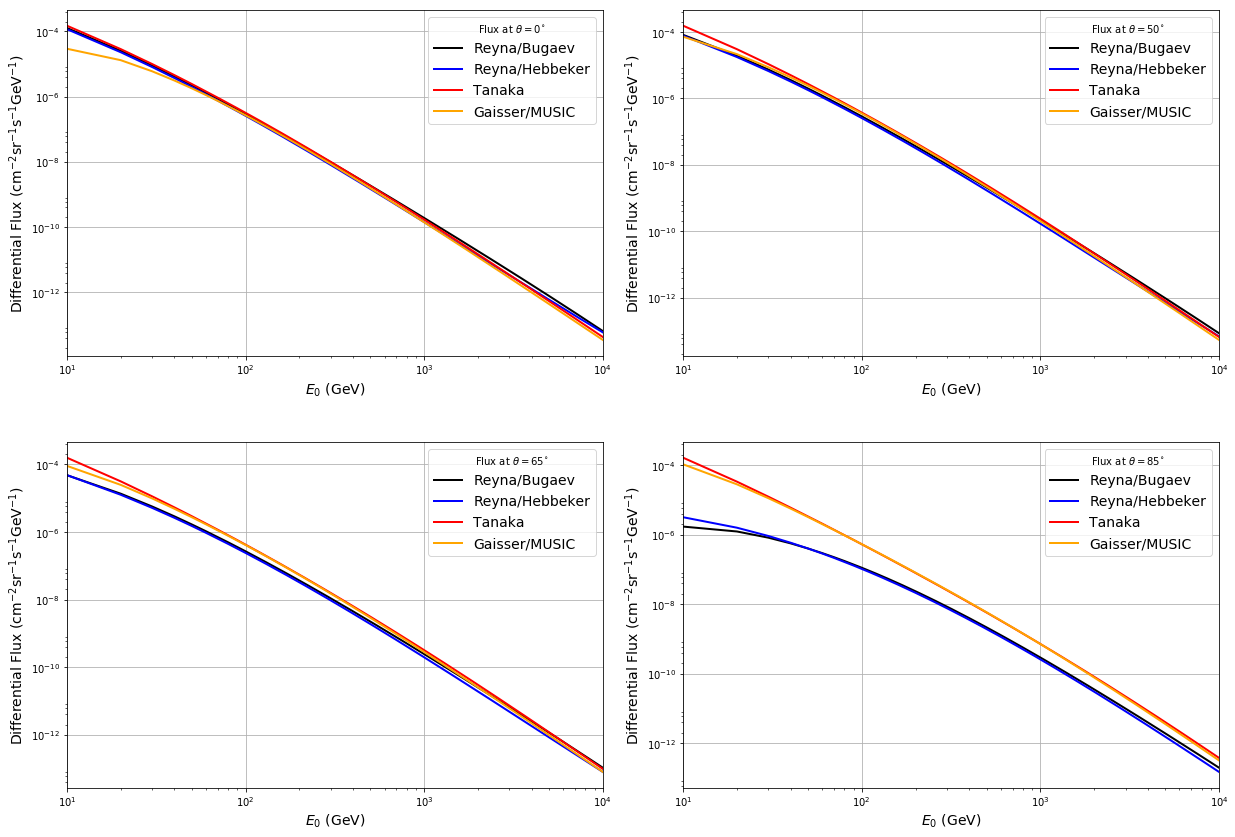

In [4]:
# Comparation of all fluxes...!
plt.figure(figsize=(8,12))
plt.subplot(221)
plt.plot(E0, Flujo_RB(np.radians(0),E0),'k',label='Reyna/Bugaev',lw=2)
plt.plot(E0, Flujo_RH(np.radians(0),E0),'b',label='Reyna/Hebbeker',lw=2)
plt.plot(E0, Flujo_T(np.radians(0),E0),'r',label='Tanaka',lw=2)
plt.plot(E0, Flujo_GM(np.radians(0),E0),'orange',label='Gaisser/MUSIC',lw=2)
plt.legend(title=r'Flux at $\theta=$0$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E4)

plt.subplot(222)
plt.plot(E0, Flujo_RB(np.radians(50),E0),'k',label='Reyna/Bugaev',lw=2)
plt.plot(E0, Flujo_RH(np.radians(50),E0),'b',label='Reyna/Hebbeker',lw=2)
plt.plot(E0, Flujo_T(np.radians(50),E0),'r',label='Tanaka',lw=2)
plt.plot(E0, Flujo_GM(np.radians(50),E0),'orange',label='Gaisser/MUSIC',lw=2)
plt.legend(title=r'Flux at $\theta=$50$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E4)

plt.subplot(223)
plt.plot(E0, Flujo_RB(np.radians(65),E0),'k',label='Reyna/Bugaev',lw=2)
plt.plot(E0, Flujo_RH(np.radians(65),E0),'b',label='Reyna/Hebbeker',lw=2)
plt.plot(E0, Flujo_T(np.radians(65),E0),'r',label='Tanaka',lw=2)
plt.plot(E0, Flujo_GM(np.radians(65),E0),'orange',label='Gaisser/MUSIC',lw=2)
plt.legend(title=r'Flux at $\theta=$65$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E4)

plt.subplot(224)
plt.plot(E0, Flujo_RB(np.radians(85),E0),'k',label='Reyna/Bugaev',lw=2)
plt.plot(E0, Flujo_RH(np.radians(85),E0),'b',label='Reyna/Hebbeker',lw=2)
plt.plot(E0, Flujo_T(np.radians(85),E0),'r',label='Tanaka',lw=2)
plt.plot(E0, Flujo_GM(np.radians(85),E0),'orange',label='Gaisser/MUSIC',lw=2)
plt.legend(title=r'Flux at $\theta=$85$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E4)

plt.subplots_adjust(top=0.9,bottom=0,left=0,right=2,hspace=0.25,wspace=0.15)
plt.show()

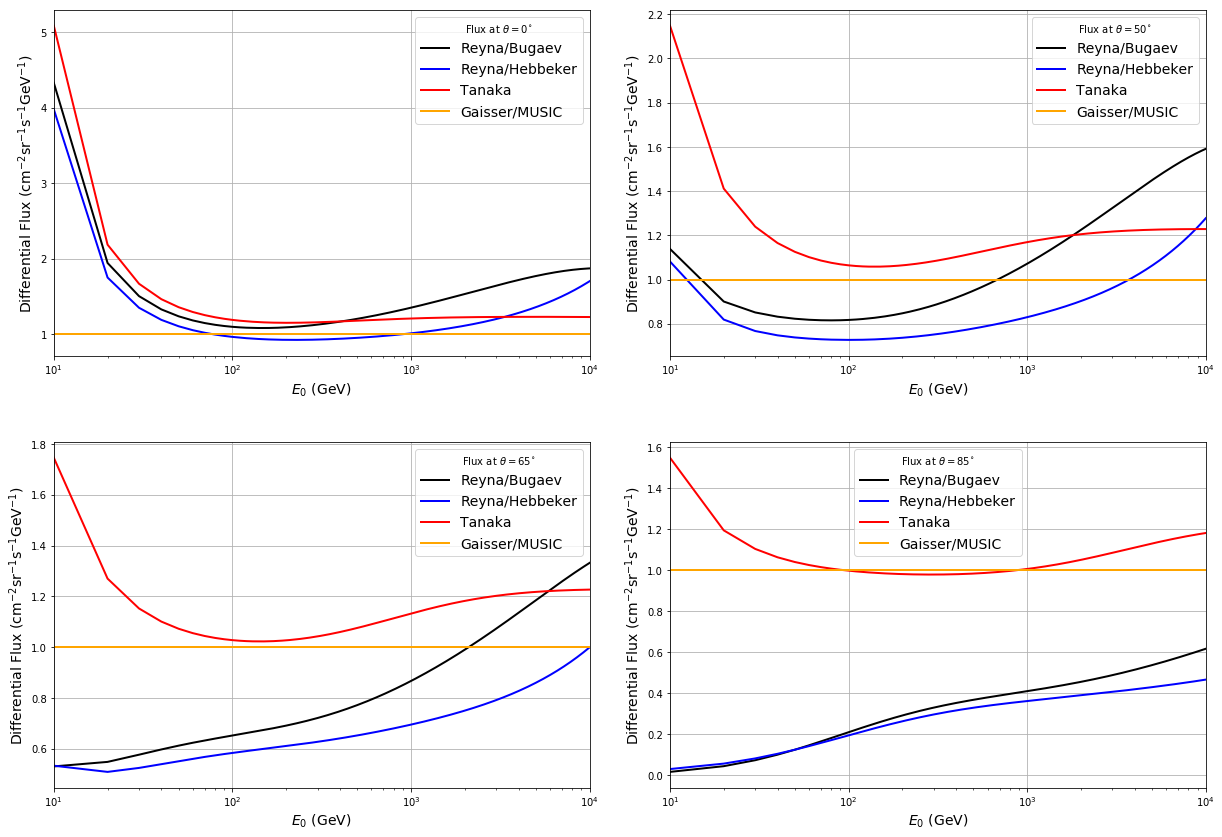

In [5]:
# Ratio of flux respect to Gaisser/MUSIC flux
plt.figure(figsize=(8,12))
plt.subplot(221)
plt.plot(E0, Flujo_RB(np.radians(0),E0)/Flujo_GM(np.radians(0),E0),'k',label='Reyna/Bugaev',lw=2)
plt.plot(E0, Flujo_RH(np.radians(0),E0)/Flujo_GM(np.radians(0),E0),'b',label='Reyna/Hebbeker',lw=2)
plt.plot(E0, Flujo_T(np.radians(0),E0)/Flujo_GM(np.radians(0),E0),'r',label='Tanaka',lw=2)
plt.plot(E0, Flujo_GM(np.radians(0),E0)/Flujo_GM(np.radians(0),E0),'orange',label='Gaisser/MUSIC',lw=2)
plt.legend(title=r'Flux at $\theta=$0$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
#plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E4)

plt.subplot(222)
plt.plot(E0, Flujo_RB(np.radians(50),E0)/Flujo_GM(np.radians(50),E0),'k',label='Reyna/Bugaev',lw=2)
plt.plot(E0, Flujo_RH(np.radians(50),E0)/Flujo_GM(np.radians(50),E0),'b',label='Reyna/Hebbeker',lw=2)
plt.plot(E0, Flujo_T(np.radians(50),E0)/Flujo_GM(np.radians(50),E0),'r',label='Tanaka',lw=2)
plt.plot(E0, Flujo_GM(np.radians(50),E0)/Flujo_GM(np.radians(50),E0),'orange',label='Gaisser/MUSIC',lw=2)
plt.legend(title=r'Flux at $\theta=$50$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
#plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E4)

plt.subplot(223)
plt.plot(E0, Flujo_RB(np.radians(65),E0)/Flujo_GM(np.radians(65),E0),'k',label='Reyna/Bugaev',lw=2)
plt.plot(E0, Flujo_RH(np.radians(65),E0)/Flujo_GM(np.radians(65),E0),'b',label='Reyna/Hebbeker',lw=2)
plt.plot(E0, Flujo_T(np.radians(65),E0)/Flujo_GM(np.radians(65),E0),'r',label='Tanaka',lw=2)
plt.plot(E0, Flujo_GM(np.radians(65),E0)/Flujo_GM(np.radians(65),E0),'orange',label='Gaisser/MUSIC',lw=2)
plt.legend(title=r'Flux at $\theta=$65$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
#plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E4)

plt.subplot(224)
plt.plot(E0, Flujo_RB(np.radians(85),E0)/Flujo_GM(np.radians(85),E0),'k',label='Reyna/Bugaev',lw=2)
plt.plot(E0, Flujo_RH(np.radians(85),E0)/Flujo_GM(np.radians(85),E0),'b',label='Reyna/Hebbeker',lw=2)
plt.plot(E0, Flujo_T(np.radians(85),E0)/Flujo_GM(np.radians(85),E0),'r',label='Tanaka',lw=2)
plt.plot(E0, Flujo_GM(np.radians(85),E0)/Flujo_GM(np.radians(85),E0),'orange',label='Gaisser/MUSIC',lw=2)
plt.legend(title=r'Flux at $\theta=$85$^{\circ}$',loc='best',fontsize=14)
plt.ylabel(r'Differential Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$GeV$^{-1}$)',fontsize=14)
plt.xlabel(r'$E_0$ (GeV)',fontsize=14)
#plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlim(1E1,1E4)

plt.subplots_adjust(top=0.9,bottom=0,left=0,right=2,hspace=0.25,wspace=0.15)
plt.show()